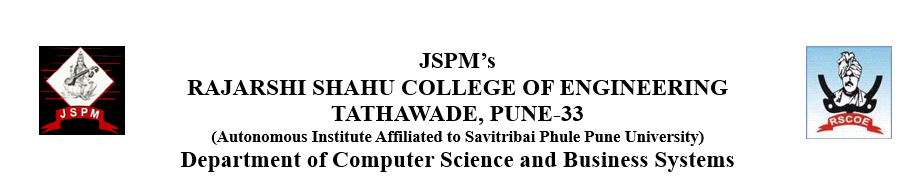

### Name: Gitanjali Govardhan Shinde

### PRN No.: RBT21CB068


# Problem Statement:

Market Basket Analysis (MBA) is a powerful technique in data mining and business intelligence that explores associations and patterns among items purchased together. The objective of this practical is to apply the Apriori algorithm to a groceries dataset, uncover meaningful associations between products, and provide insights that can aid in optimizing product placement, marketing strategies, and inventory management for a retail business.
Market Basket Analysis using the Apriori algorithm is a popular technique for discovering associations among items in transactional databases.


# Introduction:

## Theory:

In the retail industry, understanding customer purchasing behavior is essential for enhancing the overall shopping experience and increasing revenue. Market Basket Analysis is a data mining technique that identifies associations between items frequently purchased together. The Apriori algorithm, a classic algorithm in association rule mining, is particularly well-suited for discovering these associations by generating frequent itemsets and deriving rules based on their occurrence.

For this practical, a groceries dataset is employed, consisting of transactional records capturing the items bought by customers. By implementing the Apriori algorithm on this dataset, we aim to reveal patterns such as "customers who buy X are likely to buy Y," providing actionable insights for retailers to optimize their product offerings and marketing strategies.

The Apriori algorithm follows a two-step process:

**Step 1: Frequent Itemset Generation**
1. **Support:**
   - Measure: Support is the frequency of occurrence of an itemset in the dataset.
   - Calculation: Support is calculated as the number of transactions containing the itemset divided by the total number of transactions.
   - Formula: \( \text{Support}(X) = \frac{\text{transactions containing } X}{\text{total transactions}} \)

2. **Confidence:**
   - Measure: Confidence measures how likely item Y is purchased when item X is purchased, represented as {X -> Y}.
   - Calculation: Confidence is the ratio of the support of the itemset {X, Y} to the support of the itemset {X}.
   - Formula: \( \text{Confidence}(X \rightarrow Y) = \frac{\text{Support}(X \cup Y)}{\text{Support}(X)} \)

3. **Lift:**
   - Measure: Lift quantifies how much more likely item Y is purchased when item X is purchased, compared to when item Y is purchased independently of X.
   - Calculation: Lift is the ratio of the confidence of the itemset {X, Y} to the product of the confidences of itemsets {X} and {Y}.
   - Formula: \( \text{Lift}(X \rightarrow Y) = \frac{\text{Confidence}(X \rightarrow Y)}{\text{Support}(Y)} \)

**Step 2: Rule Generation**
1. **Apriori Algorithm:**
   - The Apriori algorithm uses a "bottom-up" approach, starting with frequent itemsets of size 1 and iteratively extending them to generate larger itemsets.
   - It prunes itemsets that do not meet the minimum support threshold, reducing the search space.
   - The algorithm exploits the Apriori property: if an itemset is frequent, then all of its subsets must also be frequent.

2. **Association Rule Generation:**
   - After obtaining frequent itemsets, association rules are generated by considering all possible combinations of items in these sets.
   - Rules are selected based on user-defined thresholds for support, confidence, and lift.
   - The process involves generating rules of the form {X -> Y} where X and Y are itemsets, and assessing their support, confidence, and lift.

In [ ]:
!pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5955 sha256=c48682d3900b67baa228dc7c4310c34346d44c98a088f758ddc985d7d1900ed6
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


# Import Libraries

In [ ]:
import numpy as np
import pandas as pd

# Read and describe dataset

In [ ]:
df=pd.read_csv('G_dataset.csv')

In [ ]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


# Exploring dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [ ]:
df.describe()

,Member_number
count,38765.000000
mean,3003.641868
std,1153.611031
min,1000.000000
25%,2002.000000
50%,3005.000000
75%,4007.000000
max,5000.000000


In [ ]:
df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [ ]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
38760    False
38761    False
38762    False
38763    False
38764    False
Length: 38765, dtype: bool

In [ ]:
df.columns.values

array(['Member_number', 'Date', 'itemDescription'], dtype=object)

In [ ]:
df.drop_duplicates(subset=None, keep=False, inplace=True)

In [ ]:
df.isna().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [ ]:
df.dropna()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


## convert string data to numreic data

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['Date'] = encoder.fit_transform(df['Date'])

Date  = {index : label for index, label in enumerate(encoder.classes_)}

Date

{0: '01-01-2014',
 1: '01-01-2015',
 2: '01-02-2014',
 3: '01-02-2015',
 4: '01-03-2014',
 5: '01-03-2015',
 6: '01-04-2014',
 7: '01-04-2015',
 8: '01-05-2014',
 9: '01-05-2015',
 10: '01-06-2014',
 11: '01-06-2015',
 12: '01-07-2014',
 13: '01-07-2015',
 14: '01-08-2014',
 15: '01-08-2015',
 16: '01-09-2014',
 17: '01-09-2015',
 18: '01-10-2014',
 19: '01-10-2015',
 20: '01-11-2014',
 21: '01-11-2015',
 22: '01-12-2014',
 23: '01-12-2015',
 24: '02-01-2014',
 25: '02-01-2015',
 26: '02-02-2014',
 27: '02-02-2015',
 28: '02-03-2014',
 29: '02-03-2015',
 30: '02-04-2014',
 31: '02-04-2015',
 32: '02-05-2014',
 33: '02-05-2015',
 34: '02-06-2014',
 35: '02-06-2015',
 36: '02-07-2014',
 37: '02-07-2015',
 38: '02-08-2014',
 39: '02-08-2015',
 40: '02-09-2014',
 41: '02-09-2015',
 42: '02-10-2014',
 43: '02-10-2015',
 44: '02-11-2014',
 45: '02-11-2015',
 46: '02-12-2014',
 47: '02-12-2015',
 48: '03-01-2014',
 49: '03-01-2015',
 50: '03-02-2014',
 51: '03-02-2015',
 52: '03-03-2014',
 53

In [ ]:
df['itemDescription'] = encoder.fit_transform(df['itemDescription'])

itemDescription  = {index : label for index, label in enumerate(encoder.classes_)}

itemDescription

{0: 'Instant food products',
 1: 'UHT-milk',
 2: 'abrasive cleaner',
 3: 'artif. sweetener',
 4: 'baby cosmetics',
 5: 'bags',
 6: 'baking powder',
 7: 'bathroom cleaner',
 8: 'beef',
 9: 'berries',
 10: 'beverages',
 11: 'bottled beer',
 12: 'bottled water',
 13: 'brandy',
 14: 'brown bread',
 15: 'butter',
 16: 'butter milk',
 17: 'cake bar',
 18: 'candles',
 19: 'candy',
 20: 'canned beer',
 21: 'canned fish',
 22: 'canned fruit',
 23: 'canned vegetables',
 24: 'cat food',
 25: 'cereals',
 26: 'chewing gum',
 27: 'chicken',
 28: 'chocolate',
 29: 'chocolate marshmallow',
 30: 'citrus fruit',
 31: 'cleaner',
 32: 'cling film/bags',
 33: 'cocoa drinks',
 34: 'coffee',
 35: 'condensed milk',
 36: 'cooking chocolate',
 37: 'cookware',
 38: 'cream',
 39: 'cream cheese ',
 40: 'curd',
 41: 'curd cheese',
 42: 'decalcifier',
 43: 'dental care',
 44: 'dessert',
 45: 'detergent',
 46: 'dish cleaner',
 47: 'dishes',
 48: 'dog food',
 49: 'domestic eggs',
 50: 'female sanitary products',
 51: 

In [ ]:
df['itemDescription'].value_counts()

164    2232
102    1760
122    1580
138    1394
165    1238
       ... 
155       5
5         4
4         3
79        1
114       1
Name: itemDescription, Length: 167, dtype: int64

In [ ]:
df['Date'].value_counts()

481    96
493    89
183    88
662    86
709    85
       ..
84     24
389    23
17     22
216    22
365    21
Name: Date, Length: 728, dtype: int64

In [ ]:
df['Member_number'].value_counts()

3180    34
3737    33
3050    31
2051    29
2394    29
        ..
1701     2
2417     2
4454     1
3197     1
1439     1
Name: Member_number, Length: 3892, dtype: int64

## grouping dataset to form a list of products bought by same customer on same date


In [ ]:

df=df.groupby(['Member_number','Date'])['itemDescription'].apply(lambda x: list(x))


In [ ]:
df.head()

Member_number  Date
1000           341     [130, 164, 132, 165]
               562          [164, 105, 128]
               565                 [20, 92]
               597                [130, 73]
               633               [138, 108]
Name: itemDescription, dtype: object

In [ ]:
transactions = df.values.tolist()
transactions[:10]

[[130, 164, 132, 165],
 [164, 105, 128],
 [20, 92],
 [130, 73],
 [138, 108],
 [56, 40],
 [130, 164, 122],
 [164, 138],
 [8, 162],
 [56, 138, 160]]

In [ ]:
from apyori import apriori
rules = apriori(transactions, min_support=0.00030,min_confidence = 0.05,min_lift = 2,min_length = 2)
results = list(rules)
results

[RelationRecord(items=frozenset({138, 3}), support=0.00047435115538388563, ordered_statistics=[OrderedStatistic(items_base=frozenset({3}), items_add=frozenset({138}), confidence=0.2413793103448276, lift=2.5552614653935586)]),
 RelationRecord(items=frozenset({9, 35}), support=0.0003388222538456326, ordered_statistics=[OrderedStatistic(items_base=frozenset({35}), items_add=frozenset({9}), confidence=0.05102040816326531, lift=2.316640502354788)]),
 RelationRecord(items=frozenset({151, 15}), support=0.0003388222538456326, ordered_statistics=[OrderedStatistic(items_base=frozenset({151}), items_add=frozenset({15}), confidence=0.07462686567164178, lift=2.117824339839265)]),
 RelationRecord(items=frozenset({20, 84}), support=0.0004065867046147591, ordered_statistics=[OrderedStatistic(items_base=frozenset({84}), items_add=frozenset({20}), confidence=0.12, lift=2.57764192139738)]),
 RelationRecord(items=frozenset({59, 28}), support=0.0004065867046147591, ordered_statistics=[OrderedStatistic(item

In [ ]:
def inspect(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))
ordered_results = pd.DataFrame(inspect(results), columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence','Lift'] )

# Results

In [ ]:

ordered_results


,Left Hand Side,Right Hand Side,Support,Confidence,Lift
0,3,138,0.000474,0.241379,2.555261
1,35,9,0.000339,0.051020,2.316641
2,151,15,0.000339,0.074627,2.117824
3,84,20,0.000407,0.120000,2.577642
4,59,28,0.000407,0.058824,2.487275
...,...,...,...,...,...
76,160,165,0.000610,0.214286,2.554293
77,130,138,0.000610,0.191489,2.027122
78,130,165,0.000407,0.230769,2.750777
79,138,130,0.000678,0.121951,2.038091


## Graphical representation of results

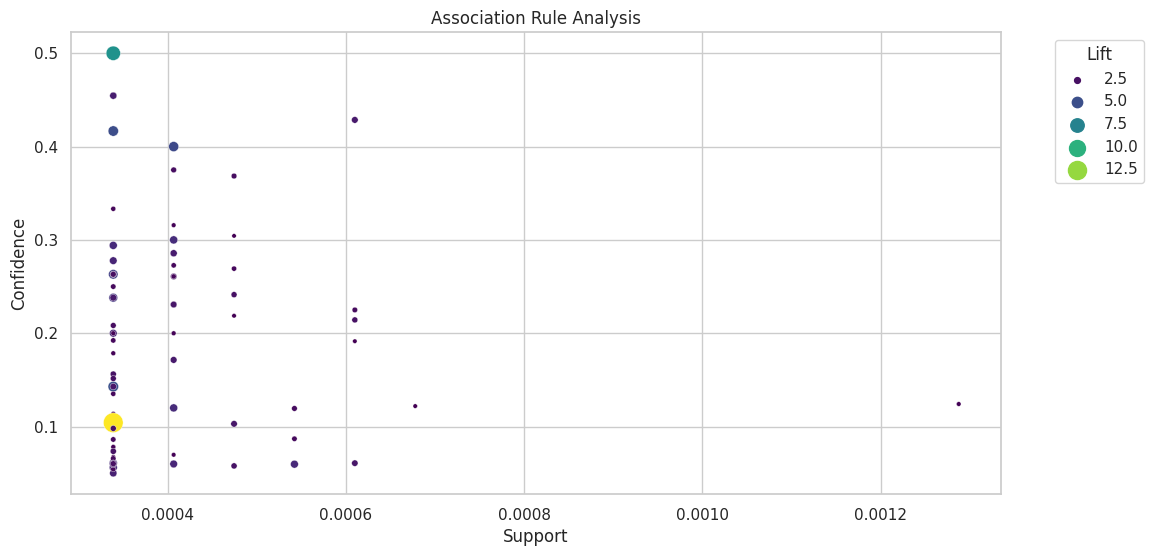

In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt



# Set the style of seaborn
sns.set(style="whitegrid")



# Create a scatter plot for Support, Confidence, and Lift
plt.figure(figsize=(12, 6))

sns.scatterplot(x='Support', y='Confidence', size='Lift', data=ordered_results, hue='Lift', palette='viridis', sizes=(10, 200))



# Add labels and a legend
plt.title('Association Rule Analysis')

plt.xlabel('Support')

plt.ylabel('Confidence')

plt.legend(title='Lift', bbox_to_anchor=(1.05, 1), loc='upper left')


# Show the plot

plt.show()


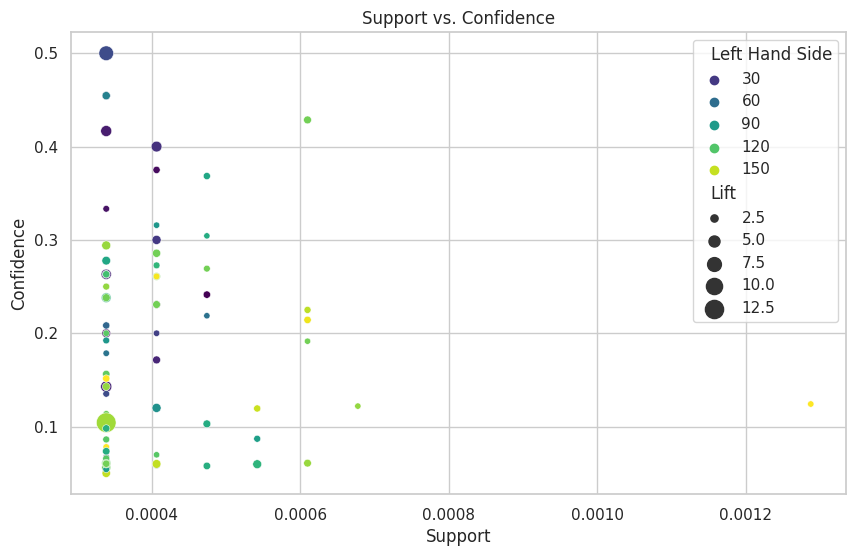

In [ ]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='Support', y='Confidence', data=ordered_results, hue='Left Hand Side', palette='viridis', size='Lift', sizes=(20, 200))
plt.title('Support vs. Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()


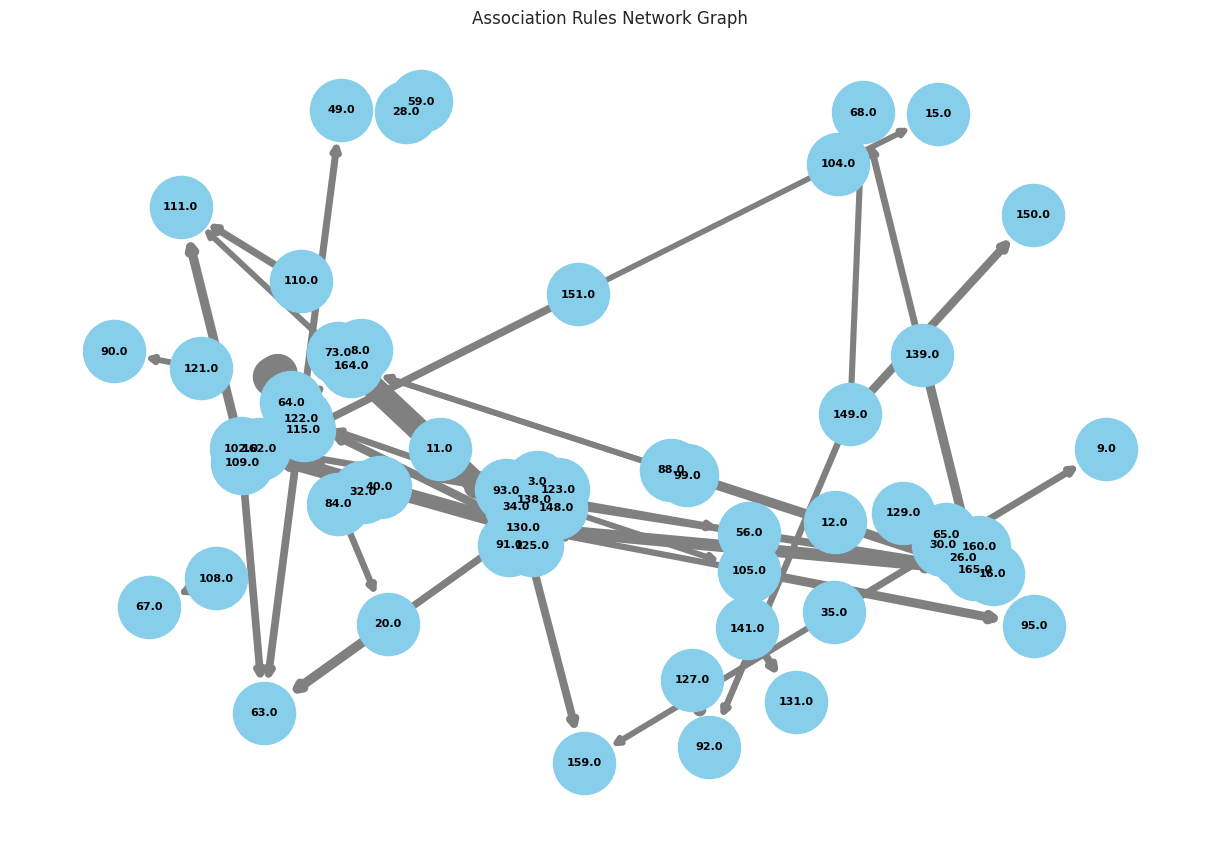

In [ ]:
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add edges and nodes to the graph
for i in range(len(ordered_results)):
    G.add_edge(ordered_results.iloc[i]['Left Hand Side'], ordered_results.iloc[i]['Right Hand Side'], weight=ordered_results.iloc[i]['Lift'])

# Draw the network graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_size=8, node_size=2000, node_color='skyblue', font_color='black', edge_color='gray', font_weight='bold', width=ordered_results['Lift']*2)

plt.title('Association Rules Network Graph')
plt.show()


# Conclusion

In conclusion, the Market Basket Analysis employing the Apriori algorithm on the groceries dataset has revealed meaningful associations between various products. Notable findings include the frequent co-purchase of products with IDs 3 and 138, suggesting a moderate yet significant association. Additionally, strategic marketing opportunities are identified, such as products 35 and 9, and 151 and 15, offering insights for effective bundling or cross-promotion. Optimizing product placement is highlighted with associations like products 84 and 20, and 59 and 28, indicating potential synergies in customer preferences. These insights provide actionable recommendations for retailers to refine product placement, design targeted marketing campaigns, and ultimately enhance the overall shopping experience, leading to increased customer satisfaction and improved business performance.